## premise: Grid search for clustering solution

via skleanr pipeline and grid search

utilize a distribution across known bins, to normalize the output variable

In [70]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

In [71]:
# QQ plot and normality testing features, pre cluster search
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [72]:
#load pipeline 1 csv and prep for clustering
m2_pipeline = pd.read_csv('pipeline1.csv')
#change is surge price rate of change per observation, change.1 is precursor
#sum_change is surge sum_change per surge, and surge_area is surge alone
keepable = ['precursor_buy_cap_pct_change', 
            'precursor_ask_cap_pct_change',
            'precursor_bid_vol_pct_change', 
            'precursor_ask_vol_pct_change', 'change.1',
            'surge_targets_met_pct']

# Normalize the 'surge_targets_met_pct' column
x = m2_pipeline[['surge_targets_met_pct']].values.astype(float)
m2_pipeline = m2_pipeline[keepable]
print(m2_pipeline.isna().sum(axis=1).astype(bool).sum())
m2_pipeline = m2_pipeline.astype('float')
m2_pipeline.dtypes

3


precursor_buy_cap_pct_change    float64
precursor_ask_cap_pct_change    float64
precursor_bid_vol_pct_change    float64
precursor_ask_vol_pct_change    float64
change.1                        float64
surge_targets_met_pct           float64
dtype: object

## using predefined bins for discrete clustering

In [73]:
# bins = [float(f"{x:.2f}") for x in range(-10, 11)]
bins = [x * 0.2 for x in range(-10, 11)]
print(bins)
#model 
m2_pipeline['bin'] = pd.cut(m2_pipeline['surge_targets_met_pct'], bins=bins  )#, labels=labels)
# Display the binned data
print(m2_pipeline['bin'].value_counts())
m2_pipeline['bin']

[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0, -0.8, -0.6000000000000001, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0]
(-0.2, 0.0]     1923
(-0.4, -0.2]    1043
(-0.6, -0.4]     591
(0.0, 0.2]       489
(-0.8, -0.6]     396
(-1.0, -0.8]     235
(0.2, 0.4]       201
(-1.2, -1.0]     157
(-1.4, -1.2]      92
(-1.6, -1.4]      71
(-1.8, -1.6]      61
(0.4, 0.6]        60
(-2.0, -1.8]      51
(0.6, 0.8]        32
(0.8, 1.0]        15
(1.0, 1.2]        13
(1.2, 1.4]        10
(1.4, 1.6]         2
(1.6, 1.8]         2
(1.8, 2.0]         1
Name: bin, dtype: int64


0               NaN
1       (-0.2, 0.0]
2       (-0.2, 0.0]
3       (-0.2, 0.0]
4       (-0.2, 0.0]
           ...     
5632    (-0.2, 0.0]
5633    (-0.2, 0.0]
5634    (-0.2, 0.0]
5635    (-0.2, 0.0]
5636    (-0.2, 0.0]
Name: bin, Length: 5637, dtype: category
Categories (20, interval[float64, right]): [(-2.0, -1.8] < (-1.8, -1.6] < (-1.6, -1.4] < (-1.4, -1.2] ... (1.2, 1.4] < (1.4, 1.6] < (1.6, 1.8] < (1.8, 2.0]]

In [74]:
m2_pipeline['bin'] = m2_pipeline['bin'].astype('category')

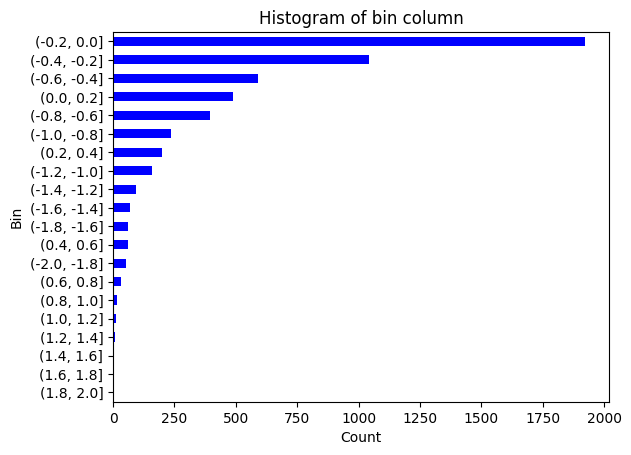

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a variable named 'm2_pipeline'
bin_counts = m2_pipeline['bin'].value_counts()

# Create a horizontal bar plot of the value counts
ax = bin_counts.plot(kind='barh', color=['red' if count < 0 else 'blue' for count in bin_counts])

# Reverse the y-axis
ax.invert_yaxis()

# Set the title and axis labels
plt.title('Histogram of bin column')
plt.xlabel('Count')
plt.ylabel('Bin')

# Display the plot
plt.show()


In [78]:
m2_pipeline.dtypes

precursor_buy_cap_pct_change     float64
precursor_ask_cap_pct_change     float64
precursor_bid_vol_pct_change     float64
precursor_ask_vol_pct_change     float64
change.1                         float64
surge_targets_met_pct            float64
bin                             category
dtype: object

https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

## NORMALIZE FEATURES TEST

study the value distribution impact of normalizing features

In [79]:
# List of columns to normalize
# SCAL3E WITH STANDARD SCALE ONCE YOU DIVDE INTO TEST TRAIN
columns_to_normalize = [
    'precursor_buy_cap_pct_change',
    'precursor_ask_cap_pct_change',
    'precursor_bid_vol_pct_change',
    'precursor_ask_vol_pct_change',
    'change.1',
    'surge_targets_met_pct'
]
# Create a StandardScaler object
scaler = StandardScaler()
# Iterate over the list of columns and normalize each column
for column in columns_to_normalize:
    m2_pipeline[column] = scaler.fit_transform(m2_pipeline[[column]])

### shapiro test for normality, in prepared features
from [scipi], (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [80]:
print("for column:")
for column in columns_to_normalize:
    # stat, p = shapiro(m2_pipeline[column])
    print(column,shapiro(m2_pipeline[column]))
    # print(column, f"Test statistic: {stat} p-Value: {p}")

for column:
precursor_buy_cap_pct_change ShapiroResult(statistic=nan, pvalue=1.0)
precursor_ask_cap_pct_change ShapiroResult(statistic=nan, pvalue=1.0)
precursor_bid_vol_pct_change ShapiroResult(statistic=nan, pvalue=1.0)
precursor_ask_vol_pct_change ShapiroResult(statistic=nan, pvalue=1.0)
change.1 ShapiroResult(statistic=nan, pvalue=1.0)
surge_targets_met_pct ShapiroResult(statistic=nan, pvalue=1.0)


/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [91]:
from scipy import stats
# df = pd.DataFrame(np.random.normal(0,1,2100).reshape(100,21)) # dataset (100x21)
# from https://stackoverflow.com/a/60709956
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
k2, p = stats.normaltest(m2_pipeline[columns_to_normalize])
print (k2, p)

[ 4553.48202201 19651.87315707  2078.18935819  2328.93461746
  8701.2295422    848.59124843] [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 5.37962134e-185]


## visualize t train normality technique

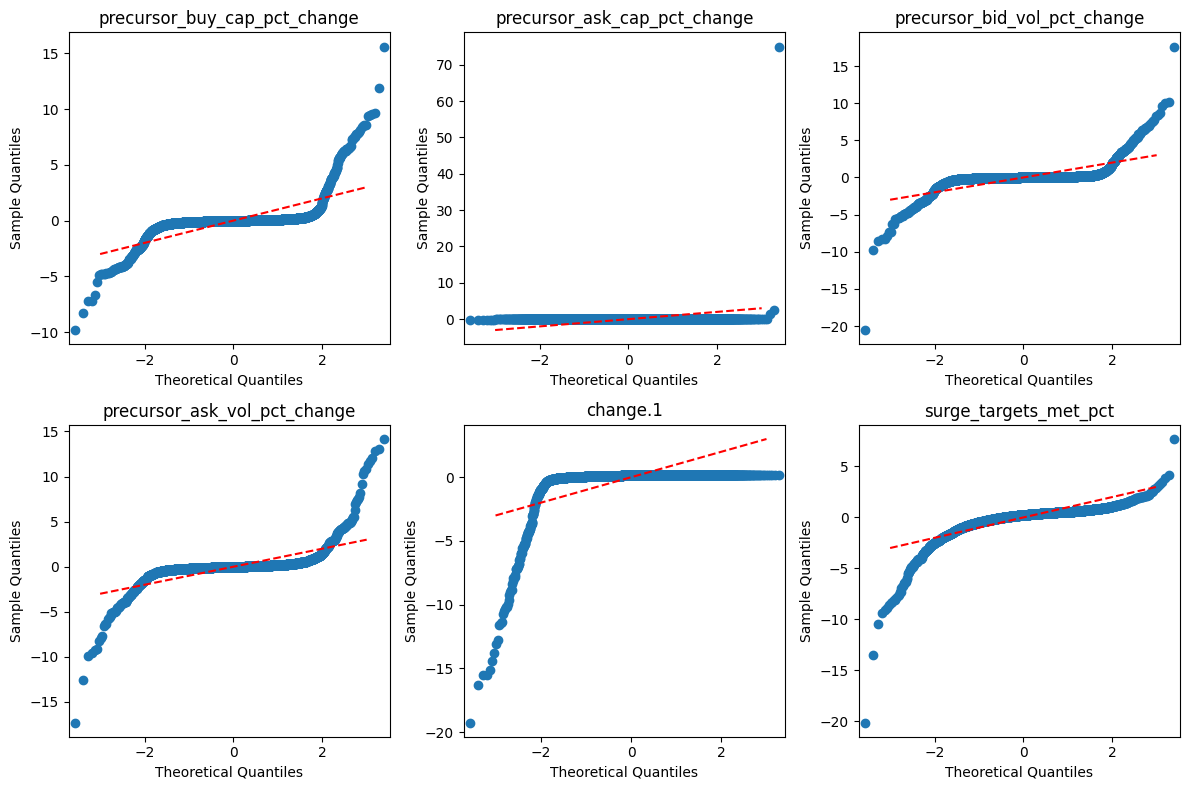

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you have loaded your data into a variable named 'm2_pipeline'
columns_to_normalize = [
    'precursor_buy_cap_pct_change',
    'precursor_ask_cap_pct_change',
    'precursor_bid_vol_pct_change',
    'precursor_ask_vol_pct_change',
    'change.1',
    'surge_targets_met_pct'
]

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over each column and create a QQ plot in each subplot
for i, column_name in enumerate(columns_to_normalize):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Retrieve the column data from the 'm2_pipeline' DataFrame
    column_data = m2_pipeline[column_name]
    
    # Create a QQ plot in the current subplot
    sm.qqplot(column_data, line='s', ax=ax)
    ax.plot([-3, 3], [-3, 3], color='red', linestyle='--')

    # Set the title for the current subplot
    ax.set_title(column_name)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the grid of QQ plots
plt.show()


In [82]:
m2_pipeline.columns

Index(['precursor_buy_cap_pct_change', 'precursor_ask_cap_pct_change',
       'precursor_bid_vol_pct_change', 'precursor_ask_vol_pct_change',
       'change.1', 'surge_targets_met_pct', 'bin'],
      dtype='object')

## Grid Search clustering techniques

In [83]:
#SPECIFIED CLUSTER DISCOVERY
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, Birch
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering,\
MeanShift, AffinityPropagation, DBSCAN, OPTICS, Birch
from sklearn.metrics import silhouette_score
m2_pipeline = m2_pipeline.dropna()

# Splitting the dataframe into features and labels
X = m2_pipeline.drop(columns=['bin'])
y = m2_pipeline['bin']

# Performing the test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#DO STANDARDIZATION ONCE YOU DO TEST TRAIN NOT BEFORE 
def silhouette_scorer(estimator, X, y=None):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score
# Defining the parameter grid for GridSearchCV
param_grid = {'n_clusters': [2,3,4,5,6,7,8,9,10]}  #'algorithm': ['auto', 'full', 'elkan']

clustering_models = [
    ('KMeans', KMeans()),
    ('SpectralClustering', SpectralClustering()),
    ('Birch', Birch()),
('Hierarchical',AgglomerativeClustering())]
# Performing GridSearchCV for each clustering model
for model_name, model in clustering_models:
    grid_search = GridSearchCV(model, param_grid, scoring=silhouette_scorer)
    grid_search.fit(X_train, y_train)
    # Evaluating the best model based on silhouette score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print(f'{model_name}:')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Silhouette score (train): {best_score:.4f}')
    print(f'Silhouette score (test): {best_score:.4f}')

/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

KMeans:
Best parameters: {'n_clusters': 9}
Silhouette score (train): 0.4592
Silhouette score (test): 0.4592


/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarn

SpectralClustering:
Best parameters: {'n_clusters': 7}
Silhouette score (train): 0.8592
Silhouette score (test): 0.8592
Birch:
Best parameters: {'n_clusters': 7}
Silhouette score (train): 0.7607
Silhouette score (test): 0.7607
Hierarchical:
Best parameters: {'n_clusters': 9}
Silhouette score (train): 0.4316
Silhouette score (test): 0.4316


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, Birch
from sklearn.cluster import MeanShift, AffinityPropagation, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score
# Splitting the dataframe into features and labels
X = m2_pipeline.drop(columns=['bin'])
y = m2_pipeline['bin']
# Performing the test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def silhouette_scorer(estimator, X, y=None):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

param_grid = {}  #'algorithm': ['auto', 'full', 'elkan']
clustering_models = [
    ('Meanshift',  MeanShift( bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)),
    ('AffinityPropagation', AffinityPropagation( damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False, random_state=42)),
    ('DBSCAN', DBSCAN(eps=0.5,  min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)),
('OPTICS', OPTICS( min_samples=5, max_eps=3, metric='minkowski', p=2, metric_params=None, cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30, memory=None, n_jobs=None))]
# Performing GridSearchCV for each clustering model
for model_name, model in clustering_models:
    grid_search = GridSearchCV(model, param_grid, scoring=silhouette_scorer)
    grid_search.fit(X_train, y_train)
    # Evaluating the best model based on silhouette score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print(f'{model_name}:')
    # print(f'Best parameters: {grid_search.best_params_}')
    print(f'Silhouette score (train): {best_score:.4f}')
    print(f'Silhouette score (test): {best_score:.4f}')

Meanshift:
Silhouette score (train): 0.4826
Silhouette score (test): 0.4826


/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/stefan/Desktop/GRU

AffinityPropagation:
Silhouette score (train): 0.1882
Silhouette score (test): 0.1882
DBSCAN:
Silhouette score (train): 0.6988
Silhouette score (test): 0.6988
OPTICS:
Silhouette score (train): -0.5152
Silhouette score (test): -0.5152


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering
from sklearn.metrics import accuracy_score
X = m2_pipeline.drop(columns=['bin'])
y = m2_pipeline['bin']
# Splitting the dataset into train and test sets

#USE STANDARD SCALING ONCE YOU DIVDE TEST AND TRAIN NOT BEFORE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of SpectralClustering
model = SpectralClustering(n_clusters=7)

# Fitting the model to the training data
model.fit_predict(X_train)

# Predicting labels for the testing data
y_pred = model.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)


/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/stefan/Desktop/GRUS/caret1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(


AttributeError: 'SpectralClustering' object has no attribute 'predict'

## notes 

1. grid search notes on [sklearn](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)
2. sklearn pipeline [guide](https://scikit-learn.org/stable/modules/compose.html#pipeline)